# Gujarat State 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt   #importing required libraries
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [4]:

dateCols = ['Date']

data = pd.read_csv("covid_19_india.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       3675 non-null   int64 
 1   Date                      3675 non-null   object
 2   Time                      3675 non-null   object
 3   State/UnionTerritory      3675 non-null   object
 4   ConfirmedIndianNational   3675 non-null   object
 5   ConfirmedForeignNational  3675 non-null   object
 6   Cured                     3675 non-null   int64 
 7   Deaths                    3675 non-null   int64 
 8   Confirmed                 3675 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 258.5+ KB


In [6]:
data.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [8]:
data_col = []

for col in data.columns:   #printing columns to eliminate column which is not necessay 
    data_col.append(col)
    
data_col

['Sno',
 'Date',
 'Time',
 'State/UnionTerritory',
 'ConfirmedIndianNational',
 'ConfirmedForeignNational',
 'Cured',
 'Deaths',
 'Confirmed']

In [11]:
data.drop(columns=['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True)
data #dropping unecessay columns

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3
...,...,...,...,...,...
3670,02/07/20,Tripura,1093,1,1396
3671,02/07/20,Uttarakhand,2317,41,2947
3672,02/07/20,Uttar Pradesh,16629,718,24056
3673,02/07/20,West Bengal,12528,683,19170


In [14]:
temp = data["State/UnionTerritory"] == 'Gujarat'
Gujarat = data.loc[temp]
Gujarat


,Date,State/UnionTerritory,Cured,Deaths,Confirmed
231,20/03/20,Gujarat,0,0,5
251,21/03/20,Gujarat,0,0,7
274,22/03/20,Gujarat,0,1,18
297,23/03/20,Gujarat,0,1,29
320,24/03/20,Gujarat,0,1,33
...,...,...,...,...,...
3505,28/06/20,Gujarat,22409,1789,30709
3541,29/06/20,Gujarat,22800,1808,31320
3577,30/06/20,Gujarat,23240,1827,31938
3613,01/07/20,Gujarat,23662,1846,32557


In [19]:
#Gujarat.Date[0:118:30]

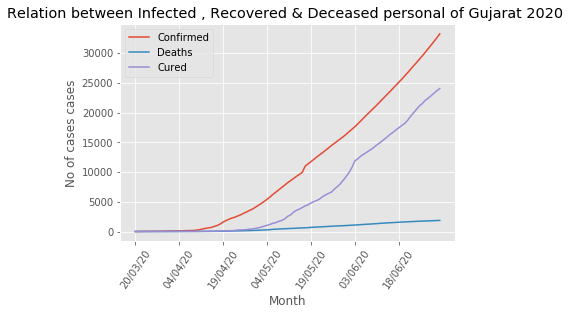

In [20]:
plt.style.use('ggplot')
plt.plot(Gujarat.Date,Gujarat.Confirmed,label="Confirmed")
plt.plot(Gujarat.Date,Gujarat.Deaths,label="Deaths")
plt.plot(Gujarat.Date,Gujarat.Cured,label="Cured")
plt.title("Relation between Infected , Recovered & Deceased personal of Gujarat 2020 ")
plt.xlabel("Month")
plt.ylabel("No of cases cases")
plt.xticks(Gujarat.Date[0:118:15].tolist(),rotation=55)
plt.legend()
plt.show()

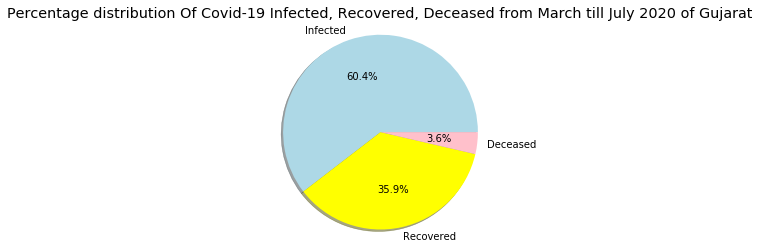

In [24]:

infected = sum(Gujarat["Confirmed"])
deceased = sum(Gujarat["Deaths"])
recovered = sum(Gujarat["Cured"])

labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['lightblue', 'yellow', 'pink']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of Covid-19 Infected, Recovered, Deceased from March till July 2020 of Gujarat")
plt.axis('equal')
plt.show()

# B. Correlation heatmap for various parameters

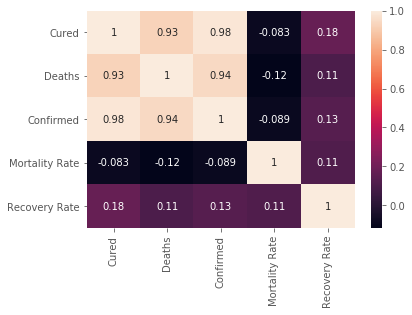

In [25]:
data['Mortality Rate'] = (data['Confirmed']/data['Deaths']).round(2)

data['Recovery Rate'] = (data['Cured']/data['Confirmed']).round(2)
sns.heatmap(data.corr(),annot=True)

# Build a model for predicting the confirmed and recovered on any dates past 15th July 2020

In [30]:
data1 = pd.read_csv('state_wise_daily.csv')

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    360 non-null    object
 1   Status  360 non-null    object
 2   TT      360 non-null    int64 
 3   AN      360 non-null    int64 
 4   AP      360 non-null    int64 
 5   AR      360 non-null    int64 
 6   AS      360 non-null    int64 
 7   BR      360 non-null    int64 
 8   CH      360 non-null    int64 
 9   CT      360 non-null    int64 
 10  DN      360 non-null    int64 
 11  DD      360 non-null    int64 
 12  DL      360 non-null    int64 
 13  GA      360 non-null    int64 
 14  GJ      360 non-null    int64 
 15  HR      360 non-null    int64 
 16  HP      360 non-null    int64 
 17  JK      360 non-null    int64 
 18  JH      360 non-null    int64 
 19  KA      360 non-null    int64 
 20  KL      360 non-null    int64 
 21  LA      360 non-null    int64 
 22  LD      360 non-null    in

In [32]:
data1.head(5)

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [33]:
data1.drop(columns=['Date'],inplace=True)

In [34]:
data1.columns

Index(['Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [35]:
x = data1[['TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN']] .values  
x[0:5]

array([[81,  0,  1,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0, 14,  0,  2,
         0,  6, 19,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  1,  3,  0,
         1,  1,  0, 12,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  4,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  5,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  2,  0,  1,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0,  1,  0,  0,  0,  0,  0]], dtype=int64)